<a href="https://colab.research.google.com/github/Soundharya127/BOSTON-HOUSING-PRICE-PREDICTION/blob/main/Boston_Housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   No Property_Type  Land_Area  Floor_Area  Condition         View  \
0   1         Condo       1784        1555        New          NaN   
1   2     Farmhouse       1768        1530        New    City View   
2   3     Apartment       2667        2667        Old  Park Facing   
3   4     Apartment       1262        1262        Old    City View   
4   5     Apartment       1720        1720  Renovated    City View   

        Amenities Furnishing_Status Air_Conditioning (Yes/No)  \
0           Basic   Fully Furnished                        No   
1           Basic    Semi Furnished                        No   
2  Rooftop Access   Fully Furnished                       Yes   
3             NaN    Semi Furnished                       Yes   
4         Parking    Semi Furnished                       Yes   

  Heating (Yes/No)  ...       Location Num_bathrooms  Num_rooms    Price  \
0              Yes  ...        Phoenix             3          2   334126   
1              Yes 

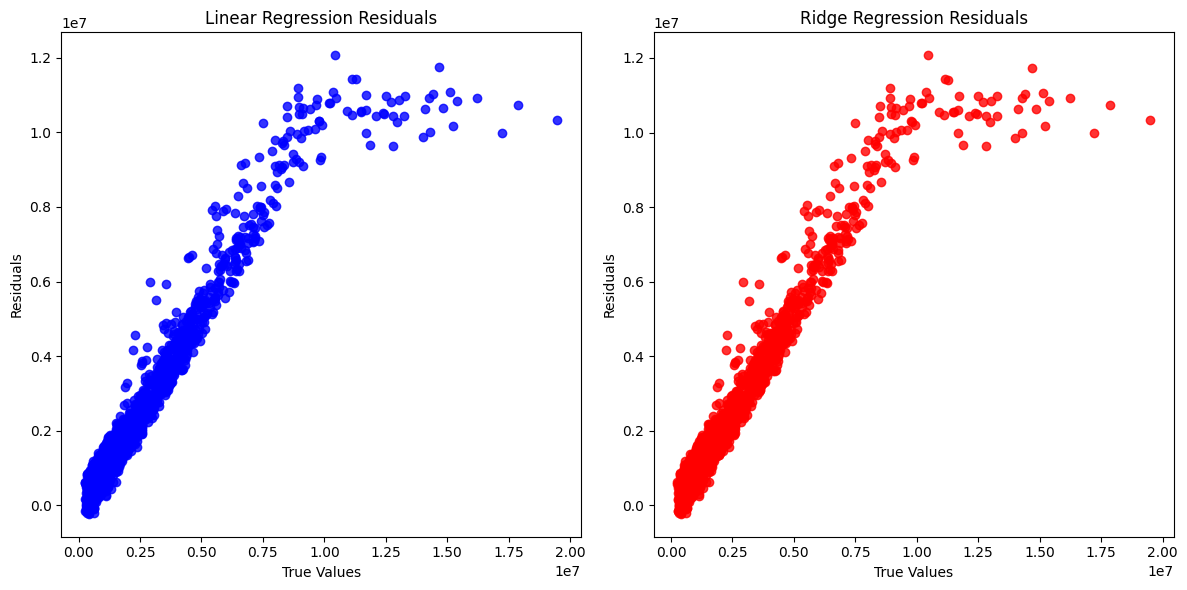

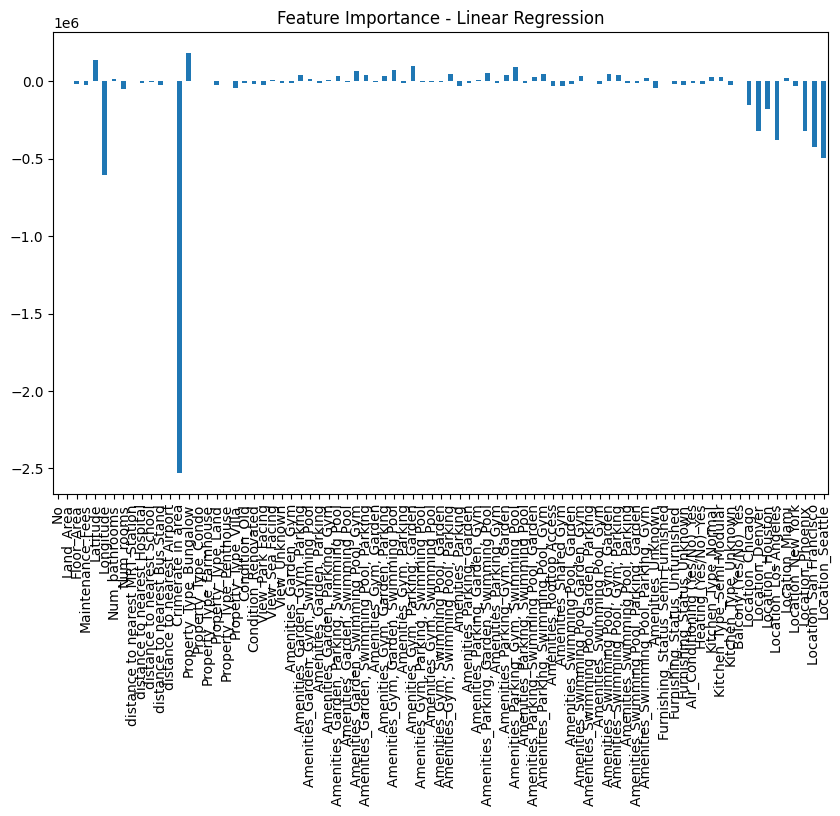

In [1]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Provide the file path
# Replace '/content/housing_data.csv' with your dataset file path
file_path = "/content/boston_housing.csv"

# Step 2: Load the dataset
df = pd.read_csv(file_path)
print("Dataset Preview:")
print(df.head())

# Step 3: Handle missing values
if df.isnull().sum().sum() > 0:
    print("Missing values found. Handling them...")
    df.fillna({col: df[col].mean() if df[col].dtype in ['float64', 'int64'] else 'Unknown' for col in df.columns}, inplace=True)

# Step 4: Define features (X) and target variable (y)
# Replace 'MEDV' with the name of your target column
# Check the columns in the dataset
# Check the columns in the dataset
print("Columns in the dataset:", df.columns)

# Replace 'Price' with the actual name of the target column
target_column = 'Price'  # Example: Update this with the correct column name
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found. Please update the column name in the code.")

X = df.drop(target_column, axis=1)
y = df[target_column]


# Step 5: Split the dataset into training and testing sets
# Convert categorical columns to numeric (if any)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 7: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Step 8: Ridge Regression with hyperparameter tuning
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 0.5, 1.0, 10.0, 50.0, 100.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Step 9: Model Evaluation
print("\nLinear Regression Results:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}\n")

print("Ridge Regression Results:")
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"R² Score: {r2_score(y_test, y_pred_ridge):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge):.2f}\n")

# Step 10: Residuals Visualization
plt.figure(figsize=(12, 6))

# Plot for Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred_lr, lowess=True, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, fit_reg=False)
plt.title("Linear Regression Residuals")
plt.xlabel("True Values")
plt.ylabel("Residuals")

# Plot for Ridge Regression Residuals
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_pred_ridge, lowess=True, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'}, fit_reg=False)
plt.title("Ridge Regression Residuals")
plt.xlabel("True Values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


# Step 11: Feature Importance for Linear Regression
plt.figure(figsize=(10, 6))
importance = pd.Series(lr_model.coef_, index=X.columns)
importance.plot(kind='bar')
plt.title("Feature Importance - Linear Regression")
plt.show()
